In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
! cp /content/kaggle.json  ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "pcb defect detection"

ref                                                           title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akhatova/pcb-defects                                          PCB Defects                                    2GB  2021-05-24 16:41:19           7362         72  0.75             
kubeedgeianvs/pcb-aoi                                         The PCB-AoI Public Dataset                    98MB  2022-07-12 14:13:43           1185         27  0.875            
yidazhang07/bridge-cracks-image                                surface-defect-detection-dataset            151MB  2020-10-09 09:19:15           3631         97  0.8125           
mauriziocalabrese/soldef-ai-pcb-dataset-for-defect-detection  SolDef_AI: PCB dataset for defect detection

In [ ]:
!kaggle datasets download -d akhatova/pcb-defects

Dataset URL: https://www.kaggle.com/datasets/akhatova/pcb-defects
License(s): unknown
100% 1.87G/1.88G [01:33<00:00, 24.5MB/s]
100% 1.88G/1.88G [01:33<00:00, 21.5MB/s]


In [ ]:
!unzip pcb-defects.zip -d /content/PCB_Dataset

Archive:  pcb-defects.zip
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_01.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_02.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_03.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_04.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_05.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_06.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_07.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_08.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_09.xml  
  inflating: /content/PCB_Dataset/PCB_DATASET/Annotations/Missing_hole/01_missing_hole_10.xml  
  inflating: /

In [ ]:
data_dir = '/content/PCB_Dataset/PCB_DATASET'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(os.listdir(data_dir))

['rotation', 'Annotations', 'PCB_USED', 'rotate.py', 'images']


In [ ]:
image_size = (150,150)
batch_size = 32

In [ ]:
datagenerator = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.2,
)

In [ ]:
train_generator = datagenerator.flow_from_directory(
    data_dir,
    target_size = image_size,
    batch_size =  batch_size,
    class_mode='binary',
    subset= 'training',
)

Found 1118 images belonging to 4 classes.


In [ ]:
validation_generator = datagenerator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 278 images belonging to 4 classes.


In [ ]:
def visualize_img(dir_name,nos_):
    k=1
    plt.figure(figsize=(8,(nos_//2)*6))
    for filename in os.listdir(dir_name)[0:nos_]:
        if filename.lower().endswith(('.jpg','.jpeg','.png')):
            ax=plt.subplot((nos_//2)+1,2,k)
            img_path=os.path.join(dir_name,filename)
            img=plt.imread(img_path)
            ax.imshow(img)
            ax.set_xlabel(filename)
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            k+=1
    plt.tight_layout()
    plt.show()

In [ ]:
template_dir = '/content/PCB_Dataset/PCB_DATASET/PCB_USED'

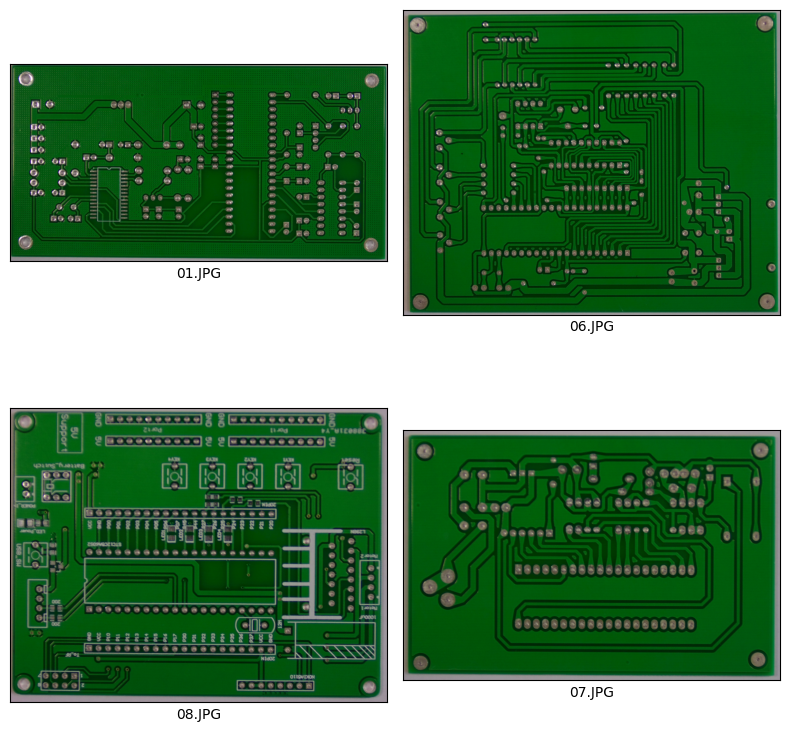

No of template images:10


In [ ]:
visualize_img(template_dir,nos_=4)

print(f'No of template images:{len(os.listdir(template_dir))}')

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    train_generator,
    validation_data= validation_generator,
    epochs=5,
    verbose=1
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0069 - loss: -15577.9111 - val_accuracy: 0.0072 - val_loss: -531062.3125
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.0062 - loss: -3233112.5000 - val_accuracy: 0.0072 - val_loss: -34488156.0000
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0064 - loss: -88441952.0000 - val_accuracy: 0.0072 - val_loss: -473245600.0000
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0100 - loss: -866293440.0000 - val_accuracy: 0.0072 - val_loss: -3047362816.0000
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.0063 - loss: -4842901504.0000 - val_accuracy: 0.0072 - val_loss: -12714490880.0000


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'validation accuracy: {val_accuracy*100:.2f}%')


9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0023 - loss: -12798171136.0000
validation accuracy: 0.72%
